## 업무 자동화 - 이메일 자동 발송

    Python의 모듈을 이용해 
        메일 자동발송
        엑셀 파일 제어
    등을 자동화 할 수 있음.

In [2]:
# smtplib : smpt 기능을 사용할 수 있게 도와주는 모듈. 메일 자동전송
import smtplib, email, os
# openpyxl : 엑셀 파일 확인하는 모듈.
import openpyxl, sys
from io import StringIO
import time
import random

from email.header import Header
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email import encoders
from email.mime.base import MIMEBase

In [12]:
# Gmail 서버에 자동 로그인 할 수 있도록 변수 선언.
gid = input('Gmail 로그인 계정 : ')
gpw = input('Gmail 로그인 비밀번호 : ')

s_time = time.time()

# 메일에 첨부할 파일
txt_files = 'UseData/eng_stop_word.txt'
img_files = 'UseData/wordcloud.png'

# 엑셀 파일에서 목록을 불러온 다음
# 자동으로 메일 보내기.
wb = openpyxl.load_workbook('UseData/email_list.xlsx')
sheet = wb['Sheet1']

member = {}

# 명단의 첫번째 줄 (name, email)은 포함 X.
for i in range(2, sheet.max_row + 1) :
    name = sheet.cell(row=i, column=1).value
    email = sheet.cell(row=i, column=2).value
    member[name] = email

# 자동 발송을 위한 서버 승인이 필요.
# 승인 받는 과정.
smtp_1 = smtplib.SMTP_SSL('smtp.gmail.com', 465)
smtp_1.ehlo()
smtp_1.login(gid, gpw)

count = 0
complete_list = []
fail_list = []

for name, email in member.items() :
    msgText = MIMEText('%s님께 \n 메일 수신 확인해주세요.' % name)
    
    # 보낼 내용을 특정 파일에서 읽어와 사용할 경우?
    """
    with open('UseData/ment.txt') as ment :
        msgText = MIMEText(ment.read() % name)
    """
    
    # txt 첨부파일 등록
    filename = txt_files
    part = MIMEBase('application', 'octet-stream')
    part.set_payload(open(filename, 'rb').read())
    encoders.encode_base64(part) # 메일 형식에 맞게 encode.
    part.add_header('Content-Disposition', 'attachment : filename = %s' % os.path.basename(filename))
    msg = MIMEMultipart()
    
    # image 첨부파일 등록
    filename2 = img_files
    part2 = MIMEBase('application', 'octet-stream')
    part2.set_payload(open(filename2, 'rb').read())
    encoders.encode_base64(part2)
    part.add_header('Content-Disposition', 'attachment : filename = %s' % os.path.basename(filename2))
    
    # 메일 보낼 내용 설정
    msg = MIMEMultipart()
    msg.attach(part)
    msg.attach(part2)
    msg.attach(msgText)
    msg['Subject'] = Header(s = '%s 님께 알려드립니다.' % name, charset = 'UTF-8')
    
    now = time.localtime()
    s = '%04d-%02d-%02d-%02d-%02d-%02d' % (now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min, now.tm_sec)
    
    sendmailStatus = smtp_1.sendmail('skdbsxir@gmail.com', email, msg.as_string())
    time.sleep(random.randrange(2, 6))
    
    print('=' * 60)
    print('%s 주소로 메일 발송 시간은 %s 입니다.' % (email, s))
    print('%s 주소로 메일 발송 완료---' % email)
    
    complete_list.append(email)
    
    count += 1
    
    if sendmailStatus != {} :
        print('%s 주소로 메일 발송 오류 : ' % (email, sendmailStatus))
        
e_time = time.time()
t_time = e_time - s_time

print('총 소요시간 : %s 초' % t_time)

smtp_1.quit()

Gmail 로그인 계정 : skdbsxir@gmail.com
Gmail 로그인 비밀번호 : 1234


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials k13sm11614714pfh.68 - gsmtp')

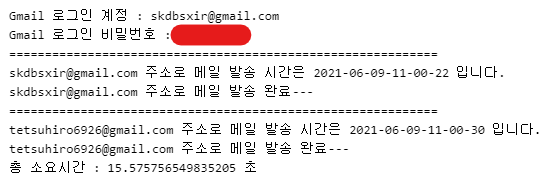

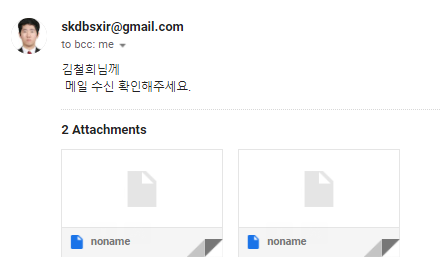

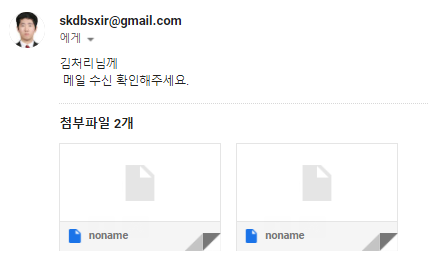

오 개쩐다... <br>

근데 뒤 확장자가 잘려서 갔네